
# Binary Cross-Entropy
$$
C_{BCE}  = -\frac{1}{n} \sum_x \sum_j y_j \ln(a^L_j)+ (1-y_j) \ln(1-a^L_j)
$$

In [1]:
# @title Import libraries and customize matplotlib styles params

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# https://matplotlib.org/stable/tutorials/introductory/customizing.html

# set defaults
plt.rcParams.update(plt.rcParamsDefault)

SMALL_SIZE  = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# fonts
plt.rc('font',  size=SMALL_SIZE)
# title
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
# legend
plt.rc('legend',fontsize =SMALL_SIZE)
plt.rc('legend',framealpha=1)
plt.rc('legend',loc='upper center')
# lines
plt.rc('lines',linewidth=1.5)
# grid
plt.rc('axes' ,grid=True)

# pixel in inches
px2inch = 1/plt.rcParams['figure.dpi']

# Logistic regression
$$
sigmoid(x)  = \frac{1}{1+e^{-(k·x+b)}} = probability
$$

$$
sigmoid(k·x+b) = probability
$$

a                        = [-2.5 -1.8 -0.8 -0.5 -0.1  0.5  0.6  0.9  1.1  1.5  1.9  2.5]
y                        = [0 0 0 1 0 1 0 1 1 1 1 1]
Logistic Regression p(y) = [0.06 0.13 0.31 0.39 0.5  0.66 0.69 0.75 0.79 0.86 0.9  0.95]
Cross Entropy sklearn    = 0.3842
Cross Entropy compute    = 0.3842


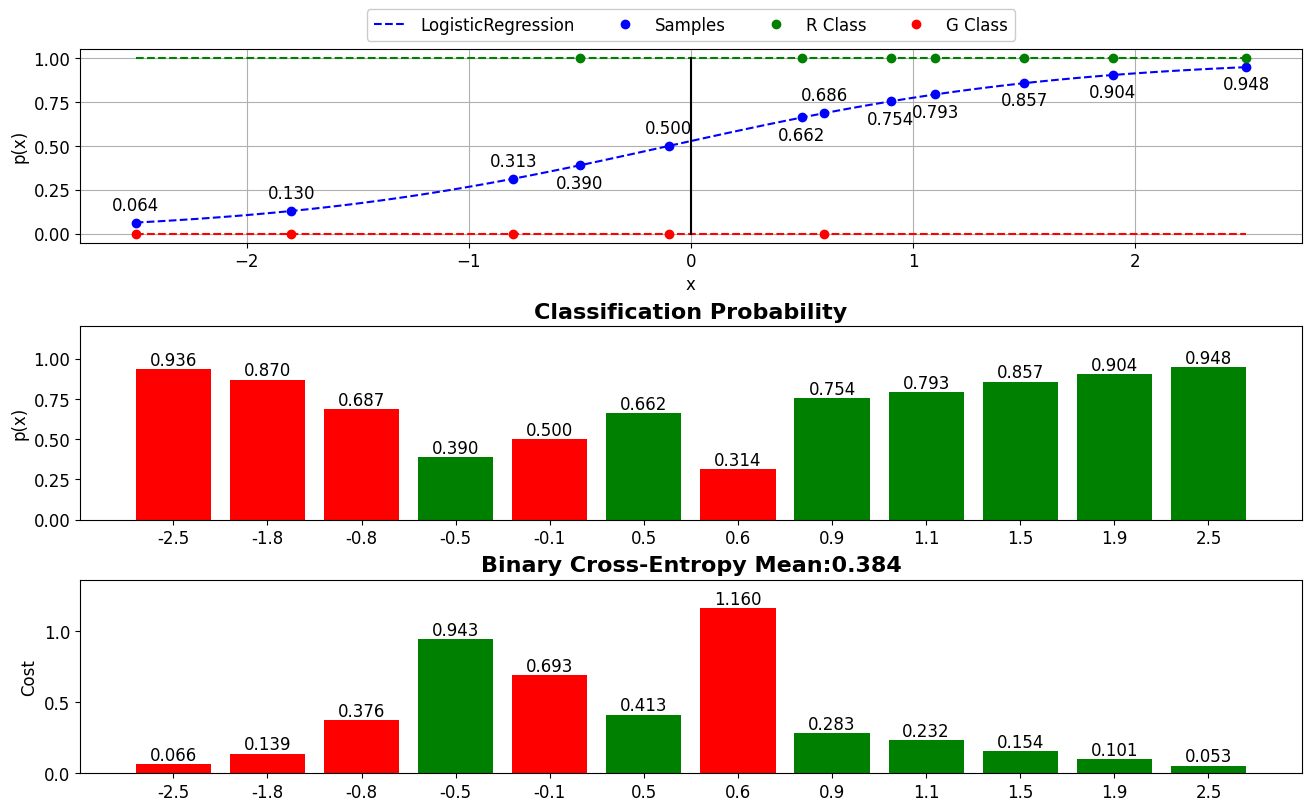

In [2]:

# @title Main code
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics      import log_loss
import numpy as np

def sigmoid(z):

    return 1/(1+np.exp(-z))

def cross_entropy(y,a):

    return -( y*np.log(a) + (1-y)*np.log(1-a) )

def cross_entropy_sum(y,a):

    return np.sum( -( y*np.log(a) + (1-y)*np.log(1-a)) ) / a.size

# original
# y = np.array([0   ,  0   , 1  ,  0  , 1  , 0  , 1  , 1  , 1  , 1  ])
# a = np.array([-1.8, -0.8, -0.5, -0.1, 0.5, 0.6, 0.9, 1.1, 1.5, 1.9])

y = np.array([0   ,0   ,  0  , 1   ,  0  , 1  ,0  , 1  , 1  , 1  , 1  ,1])
a = np.array([-2.5,-1.8, -0.8, -0.5, -0.1, 0.5,0.6, 0.9, 1.1, 1.5, 1.9,2.5])

logr = LogisticRegression()
logr.fit(a.reshape(-1, 1), y)

y_pred = logr.predict_proba(a.reshape(-1, 1))[:, 1].ravel()

x_regression = np.linspace(a[0],a[-1],100)
y_regression = sigmoid(x_regression * logr.coef_ + logr.intercept_).ravel()

loss1 = log_loss(y, y_pred)
loss2 = cross_entropy_sum(y,y_pred)

print('a                        = {}'.format(a))
print('y                        = {}'.format(y))
print('Logistic Regression p(y) = {}'.format(np.round(y_pred, 2)))
print('Cross Entropy sklearn    = {:.4f}'.format(loss1))
print('Cross Entropy compute    = {:.4f}'.format(loss2))


%matplotlib inline
fig0, ax0 = plt.subplots(3,1, constrained_layout=True,figsize=(1300*px2inch , 800*px2inch))

indx_pos = y==1
indx_neg = y==0
ax0[0].plot([np.min(a),np.max(a)],[0,0],'r--');
ax0[0].plot([np.min(a),np.max(a)],[1,1],'g--');
ax0[0].plot([0,0],[0,1],'k');

ax0[0].plot(x_regression,y_regression ,'b--',label='LogisticRegression');
ax0[0].plot(a,y_pred                  ,'bo' ,label='Samples');
ax0[0].plot(a[indx_pos],y[indx_pos]   ,'go' ,label='R Class');
ax0[0].plot(a[indx_neg],y[indx_neg]   ,'ro' ,label='G Class');

for (ai,yi,txt_dy) in zip(a,y_pred,y):

    dy = -0.1

    if txt_dy == 0: dy=-dy


    ax0[0].text(ai,yi+dy,'{:.3f}'.format(yi),ha='center',va='center')

ax0[0].set_xlabel('x')
ax0[0].set_ylabel('p(x)')
ax0[0].legend(ncol=4,loc="upper center",bbox_to_anchor=(0.5, 1.25));


classification = y*y_pred + (1-y)*(1-y_pred)
bar_colors     = ["green" if n==1  else "red" for n in y]

bar1 = ax0[1].bar(np.arange(a.size),classification,color=bar_colors);
ax0[1].bar_label(bar1,fmt='%.3f');
ax0[1].set_title('Classification Probability')
ax0[1].set_ylim(0,1.2)
ax0[1].set_xticks(np.arange(a.size),a)
ax0[1].set_ylabel('p(x)')
ax0[1].grid(False)


b_c_e      = cross_entropy(y,y_pred)
bar_colors = ["green" if n==1  else "red" for n in y]

bar2 = ax0[2].bar(np.arange(a.size),b_c_e,color=bar_colors);
ax0[2].bar_label(bar2,fmt='%.3f');
ax0[2].set_title('Binary Cross-Entropy Mean:{:.3f}'.format(loss2))
ax0[2].set_ylim(0,np.max(b_c_e)+0.2)
ax0[2].set_xticks(np.arange(a.size),a)
ax0[2].set_ylabel('Cost')
ax0[2].grid(False)


a                        = [-2.    -1.875 -1.75  -1.625 -1.5    1.5    1.625  1.75   1.875  2.   ]
y                        = [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
Logistic Regression p(y) = [0.06 0.07 0.08 0.09 0.11 0.89 0.91 0.92 0.93 0.94]
Cross Entropy compute    = 0.0854


a                        = [-2.    -1.625 -1.25  -0.875 -0.5    0.5    0.875  1.25   1.625  2.   ]
y                        = [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
Logistic Regression p(y) = [0.05 0.08 0.13 0.21 0.32 0.68 0.79 0.87 0.92 0.95]
Cross Entropy compute    = 0.1815




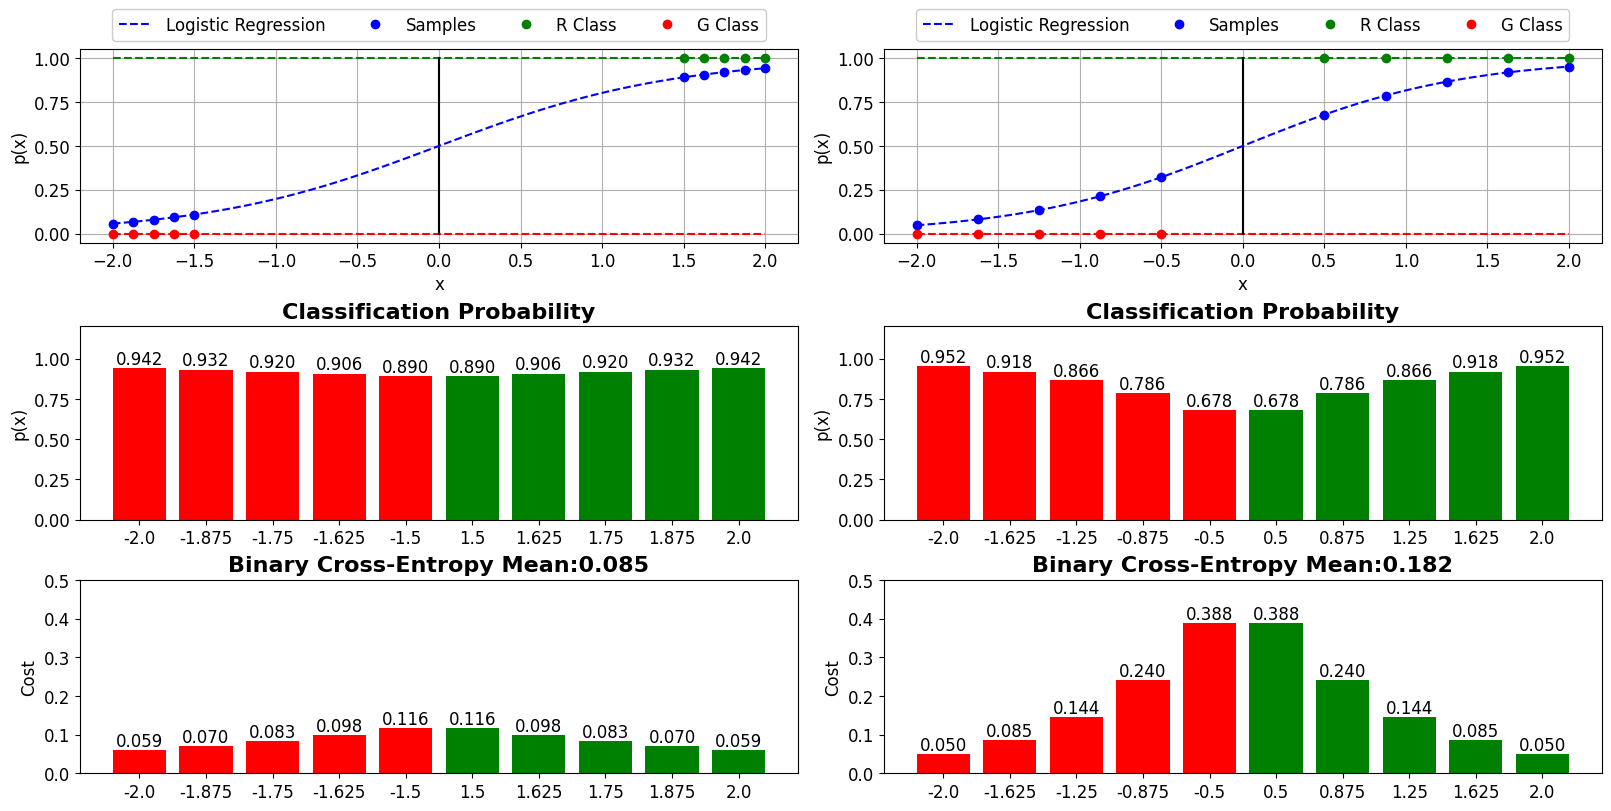

In [32]:


def subplot_entropy(maxA,minA,N):

    y = np.hstack((np.zeros(N),np.ones(N)))
    a = np.hstack((-1*np.linspace(maxA,minA,N),np.linspace(minA,maxA,N)))

    logr = LogisticRegression()
    logr.fit(a.reshape(-1, 1), y)

    y_pred = logr.predict_proba(a.reshape(-1, 1))[:, 1].ravel()

    x_regression = np.linspace(a[0],a[-1],100)
    y_regression = sigmoid(x_regression * logr.coef_ + logr.intercept_).ravel()

    loss1 = log_loss(y, y_pred)
    loss2 = cross_entropy_sum(y,y_pred)

    classification = y*y_pred + (1-y)*(1-y_pred)
    b_c_e          = cross_entropy(y,y_pred)

    print('a                        = {}'.format(a))
    print('y                        = {}'.format(y))
    print('Logistic Regression p(y) = {}'.format(np.round(y_pred, 2)))
    print('Cross Entropy compute    = {:.4f}'.format(loss2))
    print('\n')

    return y, a, y_pred, x_regression, y_regression ,loss1, loss2, classification, b_c_e


%matplotlib inline
fig0, ax0 = plt.subplots(3,2, constrained_layout=True,figsize=(1600*px2inch , 800*px2inch))

# SUBPLOT COL 1

N    = 5
maxA = 2.0
minA = 1.5
y, a, y_pred, x_regression, y_regression, loss1, loss2, classification, b_c_e  = subplot_entropy(maxA,minA,N)

bar_colors = ["green" if n==1  else "red" for n in y]

indx_pos = y==1
indx_neg = y==0
ax0[0][0].plot([np.min(a),np.max(a)],[0,0],'r--');
ax0[0][0].plot([np.min(a),np.max(a)],[1,1],'g--');
ax0[0][0].plot([0,0],[0,1],'k');
ax0[0][0].plot(x_regression,y_regression ,'b--',label='Logistic Regression');
ax0[0][0].plot(a,y_pred                  ,'bo' ,label='Samples');
ax0[0][0].plot(a[indx_pos],y[indx_pos]   ,'go' ,label='R Class');
ax0[0][0].plot(a[indx_neg],y[indx_neg]   ,'ro' ,label='G Class');
ax0[0][0].set_xlabel('x')
ax0[0][0].set_ylabel('p(x)')
ax0[0][0].legend(ncol=4,loc="upper center",bbox_to_anchor=(0.5, 1.25));

bar1 = ax0[1][0].bar(np.arange(a.size),classification,color=bar_colors);
ax0[1][0].bar_label(bar1,fmt='%.3f');
ax0[1][0].set_title('Classification Probability')
ax0[1][0].set_ylim(0,1.2)
ax0[1][0].set_xticks(np.arange(a.size),a)
ax0[1][0].set_ylabel('p(x)')
ax0[1][0].grid(False)

bar2 = ax0[2][0].bar(np.arange(a.size),b_c_e,color=bar_colors);
ax0[2][0].bar_label(bar2,fmt='%.3f');
ax0[2][0].set_title('Binary Cross-Entropy Mean:{:.3f}'.format(loss2))
ax0[2][0].set_ylim(0,0.5)
ax0[2][0].set_xticks(np.arange(a.size),a)
ax0[2][0].set_ylabel('Cost')
ax0[2][0].grid(False)


# SUBPLOT COL 2

N    = 5
maxA = 2.0
minA = 0.5
y, a, y_pred, x_regression, y_regression, loss1, loss2, classification, b_c_e  = subplot_entropy(maxA,minA,N)

bar_colors = ["green" if n==1  else "red" for n in y]

indx_pos = y==1
indx_neg = y==0
ax0[0][1].plot([np.min(a),np.max(a)],[0,0],'r--');
ax0[0][1].plot([np.min(a),np.max(a)],[1,1],'g--');
ax0[0][1].plot([0,0],[0,1],'k');
ax0[0][1].plot(x_regression,y_regression ,'b--',label='Logistic Regression');
ax0[0][1].plot(a,y_pred                  ,'bo' ,label='Samples');
ax0[0][1].plot(a[indx_pos],y[indx_pos]   ,'go' ,label='R Class');
ax0[0][1].plot(a[indx_neg],y[indx_neg]   ,'ro' ,label='G Class');
ax0[0][1].set_xlabel('x')
ax0[0][1].set_ylabel('p(x)')
ax0[0][1].legend(ncol=4,loc="upper center",bbox_to_anchor=(0.5, 1.25));

bar3 = ax0[1][1].bar(np.arange(a.size),classification,color=bar_colors);
ax0[1][1].bar_label(bar3,fmt='%.3f');
ax0[1][1].set_title('Classification Probability')
ax0[1][1].set_ylim(0,1.2)
ax0[1][1].set_xticks(np.arange(a.size),a)
ax0[1][1].set_ylabel('p(x)')
ax0[1][1].grid(False)

bar4 = ax0[2][1].bar(np.arange(a.size),b_c_e,color=bar_colors);
ax0[2][1].bar_label(bar4,fmt='%.3f');
ax0[2][1].set_title('Binary Cross-Entropy Mean:{:.3f}'.format(loss2))
ax0[2][1].set_ylim(0,0.5)
ax0[2][1].set_xticks(np.arange(a.size),a)
ax0[2][1].set_ylabel('Cost')
ax0[2][1].grid(False)
